In [1]:
root="./logs/compare_more/cifar_dirichlet/"
# root="./logs/netRes_experiments/dirichlet/"
# root="./logs/netRes_experiments/cifar_iid/"


In [2]:
import os
import numpy as np
import pandas as pd

from collections import defaultdict
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


def tabulate_events(dpath):
    
    
    
    summary_iterators = [EventAccumulator(os.path.join(dpath, dname)).Reload() for dname in os.listdir(dpath) if 'csv' not in dname]
    tags = summary_iterators[0].Tags()['scalars']
    summary_iterators=[it for it in summary_iterators if it.Tags()['scalars'] == tags]
    for it in summary_iterators:
        assert it.Tags()['scalars'] == tags

    out = defaultdict(list)
    steps = []

    for tag in tags:
        steps = [e.step for e in summary_iterators[0].Scalars(tag)]

        for events in zip(*[acc.Scalars(tag) for acc in summary_iterators]):
            assert len(set(e.step for e in events)) == 1

            out[tag].append([e.value for e in events])

    return out, steps

dict1={}
def to_csv(dpath):
    dirs = os.listdir(dpath)
    print(dirs)
    d, steps = tabulate_events(dpath)
    tags, values = zip(*d.items())

    np_values = np.array(values)

    for index, tag in enumerate(tags):
    
        df = pd.DataFrame(np_values[index], index=steps[:np_values[index].shape[0]], columns=dirs)
        file_name = tag.replace("/", "_") + '.csv'
        folder_path = os.path.join(dpath, 'csv')
        dict1[os.path.join(folder_path, file_name)]=df


def get_file_path(dpath, tag):
    file_name = tag.replace("/", "_") + '.csv'
    folder_path = os.path.join(dpath, 'csv')
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    return os.path.join(folder_path, file_name)


# if __name__ == '__main__':
#     root="./logs/netRes_experiments/cifar_dirichlet/"
    

paths=sorted([os.path.join(root,dname) for dname in os.listdir(root)])
paths=[i for i in paths if not 'attack' in i.lower()]
#     paths=[i for i in path if 'csv' not in i]
for path in paths:
    print(path)
    try:
        to_csv(path)
    except:
        continue

./logs/compare_more/cifar_dirichlet/backdoor_1
['gm', 'irlsSort', 'attention', 'median', 'mkrum', 'krum', 'aggNetBlocks']
./logs/compare_more/cifar_dirichlet/backdoor_2
['gm', 'irlsSort', 'attention', 'median', 'mkrum', 'krum', 'aggNetBlocks']
./logs/compare_more/cifar_dirichlet/backdoor_3
['gm', 'irlsSort', 'attention', 'median', 'mkrum', 'krum', 'aggNetBlocks']
./logs/compare_more/cifar_dirichlet/backdoor_4
['gm', 'irlsSort', 'attention', 'median', 'mkrum', 'krum', 'aggNetBlocks']
./logs/compare_more/cifar_dirichlet/labelFlippingDirectional_1
['gm', 'irlsSort', 'median', 'mkrum', 'krum', 'aggNetBlocks']
./logs/compare_more/cifar_dirichlet/labelFlippingDirectional_2
['gm', 'irlsSort', 'median', 'mkrum', 'krum', 'aggNetBlocks']
./logs/compare_more/cifar_dirichlet/labelFlippingDirectional_3
['gm', 'irlsSort', 'median', 'mkrum', 'krum', 'aggNetBlocks']
./logs/compare_more/cifar_dirichlet/labelFlippingDirectional_4
['gm', 'irlsSort', 'median', 'mkrum', 'krum', 'aggNetBlocks']
./logs/compa

In [3]:
len(dict1.keys())

32

In [4]:
# import os
# allfiles=[os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser("./logs")) for f in fn]

In [5]:
allfiles=sorted(dict1.keys())

In [6]:
allcsv=[i for i in allfiles if 'test_accuracy.csv' in i]
len(allcsv)

12

In [10]:
def getSortedColumnsDF(DF):
    order=['fedavg','aggNetBlocks', 'irlsSort', 'median','gm', 'mkrum', 'krum','attention']
#['fedavg','median','baseline','aggNet_noMedian','aggNetResidual','aggNetBlocks','aggNetBlocksMultiple','aggNetBlockNormalize','aggNetBlocks_dataAugment']
    order=dict(zip(order,range(len(order))))
    DF=DF.reindex([v for i,v in sorted(zip([order[i] for i in DF.columns],DF.columns))], axis=1)
    return DF

In [11]:
allcsv=[i for i in allfiles if 'test_accuracy.csv' in i]

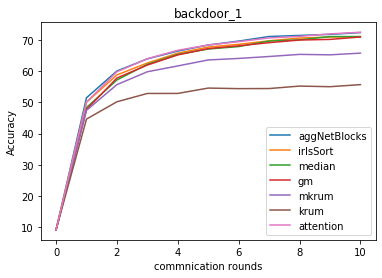

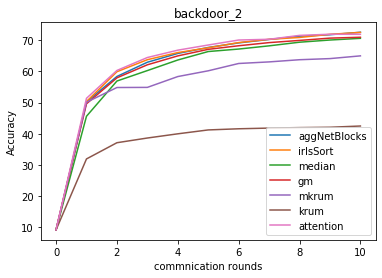

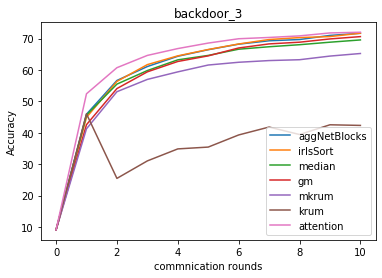

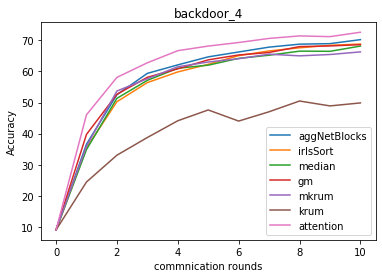

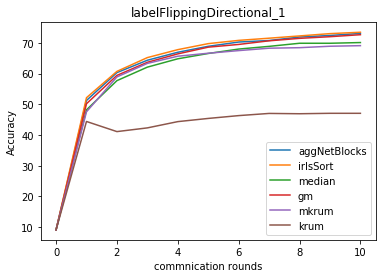

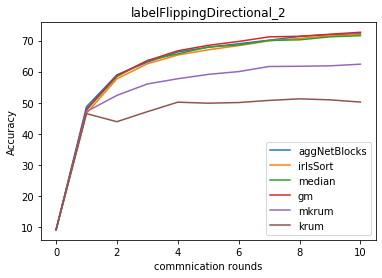

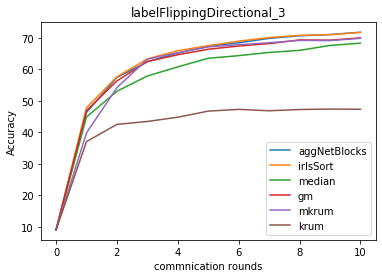

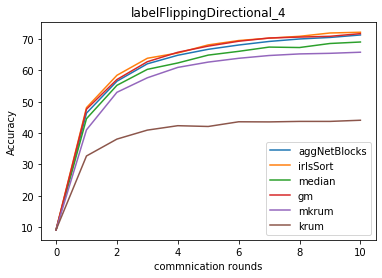

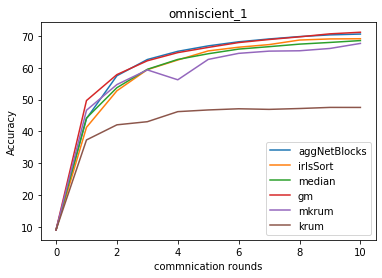

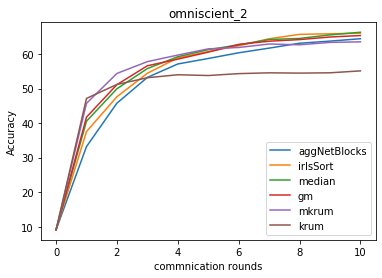

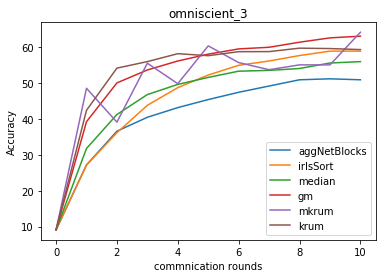

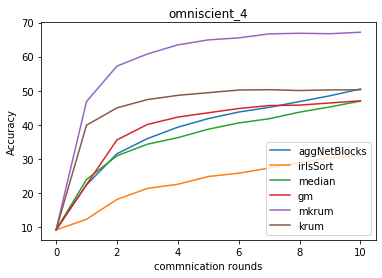

In [12]:
import pandas as pd
j=0
concatAll=pd.DataFrame()
for i in sorted(allcsv):
    DF=dict1[i]
    DF=getSortedColumnsDF(DF)
    title=i.split('/')[4]
    fig=DF.plot(title=title)
    fig.set(xlabel='commnication rounds', ylabel='Accuracy')
    fig.get_figure().savefig(f"./results/acc/{title}.svg")
    concatAll[title]=DF.iloc[-1]
concatAll.to_csv(f"./results/acc/summary.csv")

In [13]:
concatAll

,backdoor_1,backdoor_2,backdoor_3,backdoor_4,labelFlippingDirectional_1,labelFlippingDirectional_2,labelFlippingDirectional_3,labelFlippingDirectional_4,omniscient_1,omniscient_2,omniscient_3,omniscient_4
aggNetBlocks,72.449997,72.599998,71.699997,70.190002,73.099998,72.190002,71.720001,71.330002,70.580002,64.430000,50.959999,50.500000
irlsSort,71.139999,72.550003,71.730003,68.790001,73.480003,71.930000,71.660004,72.199997,69.110001,66.040001,58.950001,31.080000
median,71.169998,70.639999,69.580002,68.129997,70.120003,71.580002,68.260002,69.080002,68.529999,66.309998,56.020000,46.930000
gm,71.040001,70.989998,70.639999,68.580002,72.680000,72.680000,69.930000,71.750000,71.150002,65.360001,63.119999,47.020000
mkrum,65.849998,65.010002,65.260002,66.260002,69.110001,62.400002,69.790001,65.820000,67.639999,63.529999,64.220001,67.169998
krum,55.740002,42.470001,42.360001,49.869999,47.070000,50.220001,47.310001,44.099998,47.540001,55.119999,59.380001,50.259998
attention,72.559998,71.940002,72.029999,72.570000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
allcsv=[i for i in allfiles if 'test_backdoor_success_rate.csv' in i]

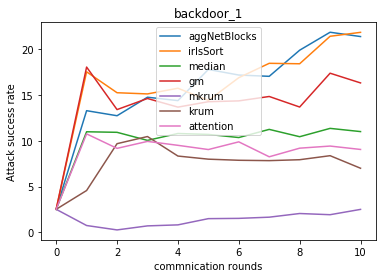

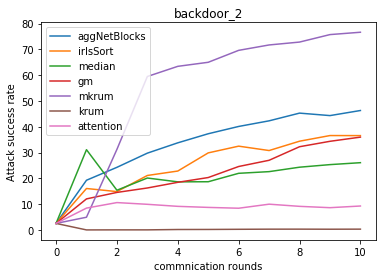

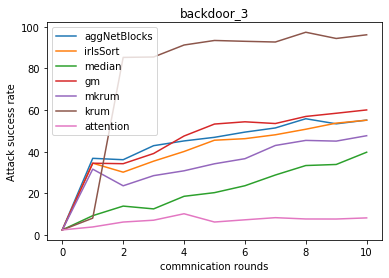

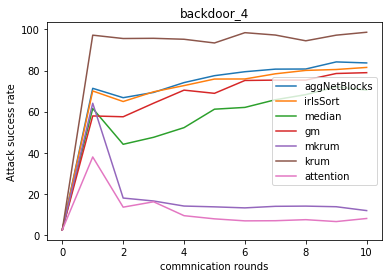

In [15]:
import pandas as pd
j=0
concatAll=pd.DataFrame()
for i in sorted(allcsv):
    DF=dict1[i]
    DF=getSortedColumnsDF(DF)
    title=i.split('/')[4]
    fig=DF.plot(title=title)
    fig.set(xlabel='commnication rounds', ylabel='Attack success rate')
    fig.get_figure().savefig(f"./results/asr/{title}.svg")
    concatAll[title]=DF.iloc[-1]
concatAll.to_csv(f"./results/asr/summary.csv")

In [111]:
# import matplotlib.pyplot as plt

# def plot(xdata,ydata,xlabel,ylabel,title,savepath):
#     _,ax=plt.subplots(figsize=(6,6))
#     plt.scatter(xdata,ydata)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.title(title)
#     sup=max(ax.get_xlim()[1],ax.get_ylim()[1])
#     inf=min(ax.get_xlim()[0],ax.get_ylim()[0])
#     plt.plot([inf, sup], [inf, sup], ls = "--",c =".3")
#     plt.savefig(savepath)
# plot(a,b,"x","y","title","./results/test.svg")

In [24]:
# a=[1,2,3]
# # b=[4,5,6]

In [25]:
# import pandas as pd
# a=list(np.random.rand(20))
# b=list(np.random.rand(20))
# c=list(np.random.rand(20))
# di={'a':a,'b':b,'c':c}

In [26]:
# df=pd.DataFrame.from_dict({'a':a})

In [27]:
# df.index=a

In [28]:
# files=os.listdir('./results/aggResult/training')

In [29]:
# l1=[]
# for f in files:
#     key=f.split('_')[2]
#     item=pd.read_csv('./results/aggResult/training/'+f)
#     l1.append((key,item))
    


In [30]:
# [i[0] for i in l1]

In [31]:
# def getSorted(L):
#     order=['random','fedavg','median','baseline','aggNet','aggNetRes','aggNetBlock','aggNetBlockMultiple']
#     order=dict(zip(order,range(len(order))))
#     sortedL=[v for i,v in sorted(zip([order[k] for k,i in L],L))]
#     return sortedL

In [32]:
# from matplotlib import rcParams
# rcParams.update({'figure.autolayout': True})
# for (key,item) in getSorted(l1):
#     df=item
#     x=df.Step
#     y=df.Value
#     start_index=x.where(x==0).last_valid_index()
#     plt.plot(x[start_index:start_index+80],y[start_index:start_index+80],label=key)
# plt.legend()
# plt.xlabel('epochs')
# plt.ylabel('Average BCE loss')
# plt.savefig('./results/aggResult/convergence-BCE.svg')